In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
np.set_printoptions(suppress=True)
from numpy import exp
from numpy.random import seed
seed(1)
from math import sqrt
import pandas as pd
np.set_printoptions(suppress=True)
import keras
import scipy as sp
from scipy import stats
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
from keras import initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# to check RPM of sensor and survellience 
df_vib_survellience=pd.read_excel('humanfilled_params_modified.xlsx')
#load all the years Temp and combine together
df_vib_2016 = pd.read_csv('2016_Vibration.csv')
df_vib_2016.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018']
#df_vib_2016['first'] =df_vib_2016['first'].str.replace('EST', '')
#df_vib_2016['Dates'] = pd.to_datetime(df_vib_2016['time'] ).dt.date
#df_vib_2016['Time'] = pd.to_datetime(df_vib_2016['time'] ).dt.time 
#df_vib_2016['first']=pd.to_datetime(df_vib_2016['first'])
df_vib_2017 = pd.read_csv('2017_Vibration.csv')
df_vib_2017.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018']
#df_vib_2017['time'] =df_vib_2017['first'].str.replace('EST', '')
#df_vib_2017['Dates'] = pd.to_datetime(df_vib_2017['time'] ).dt.date
#df_vib_2017['Time'] = pd.to_datetime(df_vib_2017['time'] ).dt.time 
df_vib_2018 = pd.read_csv('2018_Vibration.csv')
df_vib_2018.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018']
#df_vib_2018['time'] =df_vib_2018['first'].str.replace('EST', '')
#df_vib_2018['Dates'] = pd.to_datetime(df_vib_2018['time'] ).dt.date
#df_vib_2018['Time'] = pd.to_datetime(df_vib_2018['time'] ).dt.time 
df_vib_2019 = pd.read_csv('2019_Vibration.csv')
df_vib_2019.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018']
#df_vib_2019['time'] =df_vib_2019['first'].str.replace('EST', '')
#df_vib_2019['Dates'] = pd.to_datetime(df_vib_2019['time'] ).dt.date
#df_vib_2019['Time'] = pd.to_datetime(df_vib_2019['time'] ).dt.time 
df_vib_2020 = pd.read_csv('2020_Vibration.csv')
df_vib_2020.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018']
#df_vib_2020['time'] =df_vib_2020['first'].str.replace('EST', '')
#df_vib_2020['Dates'] = pd.to_datetime(df_vib_2020['time'] ).dt.date
#df_vib_2020['Time'] = pd.to_datetime(df_vib_2020['time'] ).dt.time 
df_vib_all_year=pd.concat([df_vib_2016[:-1],df_vib_2017[:-1], df_vib_2018[:-1], df_vib_2019[:-1], df_vib_2020[:-1]], ignore_index=True)

In [ ]:
# to check RPM of sensor and survellience 
df_temp_survellience=pd.read_excel('humanfilled_params_modified.xlsx')
#load all the years Temp and combine together
df_temp_2016 = pd.read_csv('2016_Temp.csv')
df_temp_2016.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A',]
#df_temp_2016['first'] =df_temp_2016['first'].str.replace('EST', '')
#df_temp_2016['Dates'] = pd.to_datetime(df_temp_2016['time'] ).dt.date
#df_temp_2016['Time'] = pd.to_datetime(df_temp_2016['time'] ).dt.time 
#df_temp_2016['first']=pd.to_datetime(df_temp_2016['first'])
df_temp_2017 = pd.read_csv('2017_Temp.csv')
df_temp_2017.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A',]
#df_temp_2017['time'] =df_temp_2017['first'].str.replace('EST', '')
#df_temp_2017['Dates'] = pd.to_datetime(df_temp_2017['time'] ).dt.date
#df_temp_2017['Time'] = pd.to_datetime(df_temp_2017['time'] ).dt.time 
df_temp_2018 = pd.read_csv('2018_Temp.csv')
df_temp_2018.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A',]
#df_temp_2018['time'] =df_temp_2018['first'].str.replace('EST', '')
#df_temp_2018['Dates'] = pd.to_datetime(df_temp_2018['time'] ).dt.date
#df_temp_2018['Time'] = pd.to_datetime(df_temp_2018['time'] ).dt.time 
df_temp_2019 = pd.read_csv('2019_Temp.csv')
df_temp_2019.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A',]
#df_temp_2019['time'] =df_temp_2019['first'].str.replace('EST', '')
#df_temp_2019['Dates'] = pd.to_datetime(df_temp_2019['time'] ).dt.date
#df_temp_2019['Time'] = pd.to_datetime(df_temp_2019['time'] ).dt.time 
df_temp_2020 = pd.read_csv('2020_Temp.csv')
df_temp_2020.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A',]
#df_temp_2020['time'] =df_temp_2020['first'].str.replace('EST', '')
#df_temp_2020['Dates'] = pd.to_datetime(df_temp_2020['time'] ).dt.date
#df_temp_2020['Time'] = pd.to_datetime(df_temp_2020['time'] ).dt.time 
df_temp_all_year=pd.concat([df_temp_2016[:-1],df_temp_2017[:-1], df_temp_2018[:-1], df_temp_2019[:-1], df_temp_2020[:-1]], ignore_index=True)

In [ ]:
df_vib_all_year[['A2V9021A']].idxmax()
df_vib_all_year.iloc[1672268]
df_vib_all_year1=df_vib_all_year.drop(1672268, axis=0)

In [ ]:
df_vib_all_year1['A2V9021A'].describe().round()

count    2630879.0
mean        3899.0
std         1920.0
min            0.0
25%         3388.0
50%         4912.0
75%         4982.0
max         6447.0
Name: A2V9021A, dtype: float64

In [ ]:
df_vib_all_year.iloc[[1672268]]

,first,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018
1672268,07-Mar-2019 07:08:00.000 EST,1.5,1.8,1.0,1.1,0.9,0.8,3.3,3.1,2417755.0,7.5,7.8


In [ ]:
#The Freedman-Diaconis rule is very robust and works well in practice. The bin-width is set to h=2×IQR×n−1/3. So the number of bins is (max−min)/h, where n is the number of observations, 
#max is the maximum value and min is the minimum value.
h_sensor=2*1594*(2630880)**(-1/3)
h_sensor

23.09322744313016

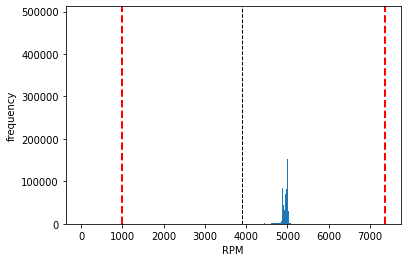

In [ ]:
plt.hist(df_vib_all_year1['A2V9021A'], density=False, bins=1000)  
plt.ylabel('frequency')
plt.xlabel('RPM')
plt.axvline(df_vib_all_year1['A2V9021A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib_all_year1['A2V9021A'], [25])-1.5*(np.percentile(df_vib_all_year['A2V9021A'], [75])-np.percentile(df_vib_all_year1['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib_all_year1['A2V9021A'], [75])+1.5*(np.percentile(df_vib_all_year['A2V9021A'], [75])-np.percentile(df_vib_all_year1['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
df_vib_all_year11=df_vib_all_year1[df_vib_all_year1['A2V9021A']>0]
df_vib_all_year11

,first,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018
0,01-Jan-2016 00:00:00.000 EST,1.5,1.6,1.0,1.2,0.9,0.8,2.9,2.9,4938.4,6.5,6.6
1,01-Jan-2016 00:01:00.000 EST,1.6,1.6,1.0,1.2,0.9,0.8,2.9,2.9,4938.0,6.5,6.7
2,01-Jan-2016 00:02:00.000 EST,1.6,1.6,1.0,1.2,0.9,0.8,2.9,2.9,4936.3,6.5,6.7
3,01-Jan-2016 00:03:00.000 EST,1.6,1.6,1.0,1.2,0.9,0.8,2.9,2.9,4937.6,6.5,6.7
4,01-Jan-2016 00:04:00.000 EST,1.6,1.6,1.0,1.2,0.9,0.8,2.9,2.9,4936.8,6.5,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2630875,31-Dec-2020 23:55:00.000 EST,1.7,1.8,0.8,1.0,1.0,0.7,3.2,3.1,4911.3,8.2,8.8
2630876,31-Dec-2020 23:56:00.000 EST,1.7,1.8,0.8,1.0,1.0,0.7,3.2,3.1,4911.2,8.2,8.8
2630877,31-Dec-2020 23:57:00.000 EST,1.7,1.8,0.8,1.0,1.0,0.7,3.2,3.1,4911.3,8.2,8.8
2630878,31-Dec-2020 23:58:00.000 EST,1.7,1.8,0.8,1.0,1.0,0.7,3.2,3.1,4911.4,8.2,8.8


In [ ]:
df_test=df_vib_all_year1[(df_vib_all_year1['A2V9021A'] >= 4800) & (df_vib_all_year1['A2V9021A'] <=5000)]

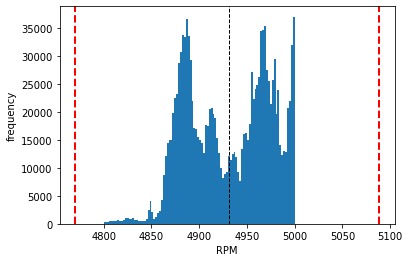

In [ ]:
plt.hist(df_test['A2V9021A'], density=False, bins=100)  
plt.ylabel('frequency')
plt.xlabel('RPM')
plt.axvline(df_test['A2V9021A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_test['A2V9021A'], [25])-1.5*(np.percentile(df_test['A2V9021A'], [75])-np.percentile(df_test['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_test['A2V9021A'], [75])+1.5*(np.percentile(df_test['A2V9021A'], [75])-np.percentile(df_test['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
df_vib_survellience1['RPM'].describe()

NameError: ignored

In [ ]:
df_vib_survellience['RPM'].idxmax()
df_vib_survellience['RPM'].iloc[34]


48671

In [ ]:
df_vib_survellience['RPM']
df_vib_survellience['RPM'].sort_values()
df_vib_survellience1 = df_vib_survellience[df_vib_survellience.RPM != 48671]
df_vib_survellience1

,Position,Date and Time,RPM,APS,overall,para1,para2,para3,para4,para5,para6
0,2-PMP-3-70-1V,20-Jan-16 13:56,4950,100,0.029,0.0290,0.0016,0.0002,0.0004,0.00011,0.00068
1,2-PMP-3-70-1V,13-Dec-19 15:15,3566,100,0.081,0.0110,0.0800,0.0065,0.0078,0.00220,0.00580
2,2-PMP-3-70-1V,07-May-20 02:51,4300,65,0.029,0.0055,0.0270,0.0023,0.0069,0.00070,0.00640
3,2-PMP-3-70-1H,13-Dec-19 15:15,3566,100,0.087,0.0850,0.0098,0.0075,0.0094,0.00160,0.00840
4,2-PMP-3-70-1H,07-May-20 02:52,4300,65,0.027,0.0170,0.0120,0.0120,0.0110,0.00060,0.00390
...,...,...,...,...,...,...,...,...,...,...,...
839,2-PMP-3-84-4VP,03-Feb-20 11:30,4953,100,0.094,0.0330,0.0410,0.0110,0.0270,0.02300,0.06700
840,2-PMP-3-84-4VP,11-May-20 09:25,4800,100,0.120,0.0290,0.0580,0.0095,0.0210,0.05200,0.08300
841,2-PMP-3-84-4VP,11-May-20 10:20,5050,100,0.161,0.0370,0.0710,0.0085,0.0210,0.12300,0.06500
842,2-PMP-3-84-4HP,11-May-20 09:27,4800,100,0.118,0.0350,0.0630,0.0071,0.0330,0.05200,0.06900


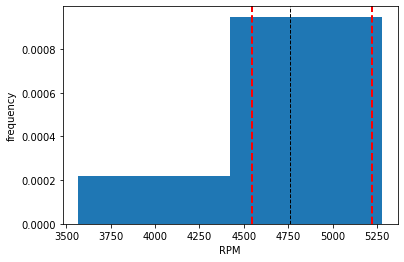

In [ ]:
plt.hist(df_vib_survellience1['RPM'], density=True, bins=2)  
plt.ylabel('frequency')
plt.xlabel('RPM')
plt.axvline(df_vib_survellience1['RPM'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib_survellience1['RPM'], [25])-1.5*(np.percentile(df_vib_survellience1['RPM'], [75])-np.percentile(df_vib_survellience1['RPM'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib_survellience1['RPM'], [75])+1.5*(np.percentile(df_vib_survellience1['RPM'], [75])-np.percentile(df_vib_survellience1['RPM'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
df_vib_survellience['RPM']

0      4950
1      3566
2      4300
3      3566
4      4300
       ... 
839    4953
840    4800
841    5050
842    4800
843    4800
Name: RPM, Length: 844, dtype: int64

In [ ]:
df_vib_survellience1[(df_vib_survellience1['RPM'] >= 3550) & (df_vib_survellience1['RPM'] <=3650)].shape

(12, 11)

In [ ]:
train_test_totals=pd.read_csv('train_test_totals1.csv')
train_test_totals_temp=pd.read_excel('train_test_totals_temp_updated.xlsx')

In [ ]:
svm_outliers_05_indexes

NameError: ignored

In [ ]:
train_test_totals

,A10V100010A10,A9V9009A9,A8V9008A8,A7V9007A7,A6V9006A6,A5V9005A5,A4V9005A4,A3V9005A3,A2V9005A2,A2V9005A,A10V100010A10.1,A9V9009A9.1,A8V9008A8.1,A7V9007A7.1,A6V9006A6.1,A5V9005A5.1,A4V9004A4,A3V9004A3,A2V9004A2,A2V9004A,A10V100010A10.2,A9V9009A9.2,A8V9008A8.2,A7V9007A7.2,A6V9007A6,A5V9007A5,A4V9007A4,A3V9007A3,A2V9007A2,A2V9007A,A10V100010A10.3,A9V9009A9.3,A8V9008A8.3,A7V9007A7.3,A6V9006A6.2,A5V9006A5,A4V9006A4,A3V9006A3,A2V9006A2,A2V9006A,...,A3V9036A3,A2V9026A2,A2V9016A,A10V1001010A10.4,A9V9099A9.4,A8V9088A8.4,A7V9077A7.4,A6V9066A6.3,A5V9055A5.2,A4V9044A4.1,A3V9033A3,A2V9022A2,A2V9021A,A10V1001010A10.5,A9V9099A9.5,A8V9089A8,A7V9079A7,A6V9069A6,A5V9059A5,A4V9049A4,A3V9039A3,A2V9029A2,A2V9019A,A10V1001010A10.6,A9V9099A9.6,A8V9088A8.5,A7V9078A7,A6V9068A6,A5V9058A5,A4V9048A4,A3V9038A3,A2V9028A2,A2V9018A,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,...,2.8,2.8,2.8,4871.9,4871.5,4871.8,4872.0,4870.7,4871.1,4870.0,4871.1,4870.7,4871.5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,0.111899,0.111899,0.006174,0.000772,0.001543,0.000424,0.002624
1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
2,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,2.7,2.7,2.7,4203.7,4206.6,4206.6,4206.7,4209.7,4212.2,4213.2,4214.7,4216.5,4218.5,5.0,5.1,5.0,5.0,5.1,5.1,5.1,5.1,5.1,5.1,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,0.128814,0.024430,0.119930,0.010216,0.030649,0.003109,0.028428
3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,2.7,2.7,2.7,4206.6,4206.6,4206.7,4209.7,4212.2,4213.2,4214.7,4216.5,4218.5,4217.9,5.1,5.0,5.0,5.1,5.1,5.1,5.1,5.1,5.1,5.1,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,0.119930,0.075512,0.053302,0.053302,0.048860,0.002665,0.017323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,...,3.0,3.0,3.0,4952.4,4951.8,4952.9,4953.0,4952.5,4952.7,4952.4,4952.5,4952.4,4952.4,7.7,7.7,7.7,7.7,7.6,7.7,7.7,7.7,7.7,7.7,8.1,8.0,8.1,8.1,8.1,8.1,8.1,8.1,8.0,8.1,0.362487,0.127256,0.158106,0.042419,0.104119,0.088694,0.258369
840,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,...,3.1,3.1,3.1,5045.1,5046.3,5046.3,5045.5,5045.0,5044.5,5044.0,5044.9,5044.7,5043.6,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,0.477500,0.115396,0.230792,0.037802,0.083562,0.206917,0.330271
841,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.0,

In [ ]:
train_test_totals_temp

,A9V9009A10,A9V9009A9,A8V9008A8,A7V9007A7,A6V9006A6,A5V9005A5,A4V9005A4,A3V9005A3,A2V9005A2,A2V9005A,A9V9009A10.1,A9V9009A9.1,A8V9008A8.1,A7V9007A7.1,A6V9006A6.1,A5V9005A5.1,A4V9004A4,A3V9004A3,A2V9004A2,A2V9004A,A9V9009A10.2,A9V9009A9.2,A8V9008A8.2,A7V9007A7.2,A6V9007A6,A5V9007A5,A4V9007A4,A3V9007A3,A2V9007A2,A2V9007A,A9V9009A10.3,A9V9009A9.3,A8V9008A8.3,A7V9007A7.3,A6V9006A6.2,A5V9006A5,A4V9006A4,A3V9006A3,A2V9006A2,A2V9006A,...,A2V9027A2,A2V9017A,A9V9099A10.3,A9V9099A9.3,A8V9088A8.3,A7V9077A7.3,A6V9066A6.2,A5V9056A5,A4V9046A4,A3V9036A3,A2V9026A2,A2V9016A,A9V9099A10.4,A9V9099A9.4,A8V9089A8,A7V9079A7,A6V9069A6,A5V9059A5,A4V9049A4,A3V9039A3,A2V9029A2,A8V9089A8.1,A9V9099A9.5,A8V9088A8.4,A7V9077A7.4,A6V9066A6.3,A5V9055A5.2,A4V9044A4.1,A3V9033A3,A2V9022A2,A2V9021A,A2V9021A.1,RPM,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,159.9,159.9,159.9,159.9,159.9,159.9,159.9,159.9,159.9,159.9,156.1,156.1,156.1,156.1,156.1,156.1,156.1,156.1,156.1,156.1,136.5,136.5,136.5,136.5,136.5,136.5,136.5,136.5,136.5,136.5,126.5,126.5,126.5,126.5,126.5,126.5,126.5,126.5,126.5,126.5,...,293.3,293.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,127.9,127.9,127.9,127.9,127.9,127.9,127.9,127.9,127.9,127.9,136.2,136.2,136.2,136.2,136.2,136.2,136.2,136.2,136.2,136.2,4950,0.111899,0.111899,0.006174,0.000772,0.001543,0.000424,0.002624
1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,...,259.3,259.3,109.9,110.2,110.2,110.2,110.2,110.2,110.2,110.2,110.2,110.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,3566,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
2,153.6,153.2,153.9,153.1,153.3,154.1,153.5,153.3,154.2,153.4,146.8,146.8,147.7,146.7,147.0,148.1,146.7,147.8,148.1,147.2,131.1,131.2,131.8,130.9,131.7,132.2,131.3,131.9,132.3,131.4,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,...,289.3,289.3,136.5,136.0,136.7,136.2,136.3,136.9,136.0,136.4,136.5,136.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.5,134.4,132.9,133.6,134.2,133.0,133.7,134.2,132.7,132.7,4300,0.128814,0.024430,0.119930,0.010216,0.030649,0.003109,0.028428
3,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,108.1,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.5,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,109.4,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,112.1,...,259.3,259.3,109.9,110.2,110.2,110.2,110.2,110.2,110.2,110.2,110.2,110.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,3566,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
4,153.2,153.9,153.1,153.3,154.1,153.5,153.3,154.2,153.4,154.1,146.8,147.7,146.7,147.0,148.1,146.7,147.8,148.1,147.2,147.9,131.2,131.8,130.9,131.7,132.2,131.3,131.9,132.3,131.4,132.0,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,129.5,...,289.3,289.3,136.0,136.7,136.2,136.3,136.9,136.0,136.4,136.5,136.4,136.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.4,132.9,133.6,134.2,133.0,133.7,134.2,132.7,134.2,134.2,4300,0.119930,0.075512,0.053302,0.053302,0.048860,0.002665,0.017323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,165.3,165.4,164.4,164.8,165.6,164.5,164.7,166.0,164.5,164.8,161.9,162.5,160.8,161.8,162.3,160.8,161.0,162.8,161.0,160.9,141.0,141.6,139.7,140.8,141.2,139.7,140.1,141.6,139.8,140.0,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5,...,296.4,296.4,151.8,152.0,150.9,151.9,152.2,151.8,151.7,152.5,151.4,151.5,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
train_test_totals_temp['x1'] = train_test_totals_temp.iloc[:,0:10].mean(axis=1)
train_test_totals_temp['x2'] = train_test_totals_temp.iloc[:,10:20].mean(axis=1)
train_test_totals_temp['x3'] = train_test_totals_temp.iloc[:,20:30].mean(axis=1)
train_test_totals_temp['x4'] = train_test_totals_temp.iloc[:,30:40].mean(axis=1)
train_test_totals_temp['x5'] = train_test_totals_temp.iloc[:,40:50].mean(axis=1)
train_test_totals_temp['x6'] = train_test_totals_temp.iloc[:,50:60].mean(axis=1)
train_test_totals_temp['x7'] = train_test_totals_temp.iloc[:,60:70].mean(axis=1)
train_test_totals_temp['x8'] = train_test_totals_temp.iloc[:,70:80].mean(axis=1)
train_test_totals_temp['x9'] = train_test_totals_temp.iloc[:,80:90].mean(axis=1)
train_test_totals_temp['x10'] = train_test_totals_temp.iloc[:,90:100].mean(axis=1)

In [ ]:
train_test_totals.iloc[:,100:110]

,A10V1001010A10.6,A9V9099A9.6,A8V9088A8.5,A7V9078A7,A6V9068A6,A5V9058A5,A4V9048A4,A3V9038A3,A2V9028A2,A2V9018A
0,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2
1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7
...,...,...,...,...,...,...,...,...,...,...
839,8.1,8.0,8.1,8.1,8.1,8.1,8.1,8.1,8.0,8.1
840,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6
841,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6
842,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6,8.6


In [ ]:
train_test_totals['x1'] = train_test_totals.iloc[:,0:10].mean(axis=1)
train_test_totals['x2'] = train_test_totals.iloc[:,10:20].mean(axis=1)
train_test_totals['x3'] = train_test_totals.iloc[:,20:30].mean(axis=1)
train_test_totals['x4'] = train_test_totals.iloc[:,30:40].mean(axis=1)
train_test_totals['x5'] = train_test_totals.iloc[:,40:50].mean(axis=1)
train_test_totals['x6'] = train_test_totals.iloc[:,50:60].mean(axis=1)
train_test_totals['x7'] = train_test_totals.iloc[:,60:70].mean(axis=1)
train_test_totals['x8'] = train_test_totals.iloc[:,70:80].mean(axis=1)
train_test_totals['rpm_sensor'] = train_test_totals.iloc[:,80:90].mean(axis=1)
train_test_totals['x9'] = train_test_totals.iloc[:,90:100].mean(axis=1)
train_test_totals['x10'] = train_test_totals.iloc[:,100:110].mean(axis=1)

In [ ]:
train_test_totals.columns

Index(['A10V100010A10', 'A9V9009A9', 'A8V9008A8', 'A7V9007A7', 'A6V9006A6',
       'A5V9005A5', 'A4V9005A4', 'A3V9005A3', 'A2V9005A2', 'A2V9005A',
       ...
       'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'rpm_sensor', 'x9', 'x10'],
      dtype='object', length=128)

In [ ]:
df_train_test_totals=train_test_totals[['x1','x2','x3','x4','x5','x6','x7','x8','rpm_sensor','x9','x10','param_overall_MILS','param1_MILS','param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']]
normalized_df_vibration=(df_train_test_totals-df_train_test_totals.min())/(df_train_test_totals.max()-df_train_test_totals.min())
normalized_df_vibration

,x1,x2,x3,x4,x5,x6,x7,x8,rpm_sensor,x9,x10,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.200000,0.213333,0.121622,0.160000,0.110807,0.093333,0.357923,0.364865,0.965453,0.734177,0.714286,0.039756,0.150859,0.001688,0.000000,0.000652,0.000168,0.001883
1,0.026667,0.026667,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.784810,0.809524,0.192061,0.067093,0.260009,0.067107,0.065324,0.005693,0.022919
2,0.226667,0.226667,0.094595,0.106667,0.124487,0.120000,0.357923,0.351351,0.834567,0.616456,0.654762,0.047758,0.012566,0.071270,0.018617,0.047435,0.001474,0.020968
3,0.026667,0.026667,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.784810,0.809524,0.207264,0.693749,0.030019,0.077666,0.079099,0.004130,0.033220
4,0.226667,0.226667,0.094595,0.106667,0.124487,0.120000,0.357923,0.351351,0.834848,0.617722,0.654762,0.043555,0.093329,0.030515,0.103550,0.076709,0.001258,0.012755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.213333,0.240000,0.108108,0.146667,0.124487,0.120000,0.398907,0.391892,0.981560,0.948101,0.938095,0.158303,0.175140,0.094621,0.082096,0.165530,0.043102,0.191043
840,0.226667,0.253333,0.121622,0.160000,0.110807,0.106667,0.426230,0.405405,0.999891,1.000000,1.000000,0.212712,0.156388,0.139081,0.072996,0.132489,0.100605,0.244225
841,0.226667,0.253333,0.121622,0.160000,0.110807,0.106667,0.426230,0.405405,0.999477,1.000000,1.000000,0.274889,0.195194,0.162168,0.061851,0.125839,0.226236,0.181777
842,0.226667,0.253333,0.121622,0.160000,0.110807,0.106667,0.426230,0.405405,0.999828,1.000000,1.000000,0.208947,0.194135,0.151251,0.054170,0.209242,0.100605,0.203021


In [ ]:
df_train_test_totals_temp=train_test_totals_temp[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','param_overall_MILS','param1_MILS','param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']]
normalized_df_temp=(df_train_test_totals_temp-df_train_test_totals_temp.min())/(df_train_test_totals_temp.max()-df_train_test_totals_temp.min())
normalized_df_temp

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.845024,0.874296,0.790087,0.612766,0.792994,0.000000,0.332258,0.853621,0.92147,0.800000,0.039756,0.150859,0.001688,0.000000,0.000652,0.000168,0.001883
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.834224,0.000000,0.000000,0.00000,0.000000,0.192061,0.067093,0.260009,0.067107,0.065324,0.005693,0.022919
2,0.741599,0.709006,0.646647,0.740426,0.707643,0.954816,0.293169,0.571990,0.00000,0.713968,0.047758,0.012566,0.071270,0.018617,0.047435,0.001474,0.020968
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.834224,0.000000,0.000000,0.00000,0.000000,0.207264,0.693749,0.030019,0.077666,0.079099,0.004130,0.033220
4,0.742414,0.711069,0.649271,0.740426,0.709554,0.955427,0.293169,0.572862,0.00000,0.720952,0.043555,0.093329,0.030515,0.103550,0.076709,0.001258,0.012755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.928222,0.977111,0.908163,0.910638,0.912102,0.993818,0.362553,0.907504,0.00000,0.913016,0.158303,0.175140,0.094621,0.082096,0.165530,0.043102,0.191043
840,0.926591,0.941839,0.921283,1.000000,0.945860,0.995268,0.438777,0.881981,0.00000,0.949206,0.212712,0.156388,0.139081,0.072996,0.132489,0.100605,0.244225
841,0.924959,0.939962,0.921283,0.995745,0.942675,0.995268,0.437799,0.881981,0.00000,0.949206,0.274889,0.195194,0.162168,0.061851,0.125839,0.226236,0.181777
842,0.926591,0.941839,0.921283,1.000000,0.945860,0.995268,0.438777,0.881981,0.00000,0.949206,0.208947,0.194135,0.151251,0.054170,0.209242,0.100605,0.203021


In [ ]:
svm_model05 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .05).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_05 = svm_model05.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_05 = where(y_pred_05 == -1) 
normals_index_05 = where(y_pred_05 == 1) 
svm_outlier_05 = normalized_df_vibration.iloc[outliers_index_05]
svm_normal_05 = normalized_df_vibration.iloc[normals_index_05]
svm_model10 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .1).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_10 = svm_model10.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_10 = where(y_pred_10 == -1) 
normals_index_10 = where(y_pred_10 == 1) 
svm_outlier_10 = normalized_df_vibration.iloc[outliers_index_10]
svm_normal_10 = normalized_df_vibration.iloc[normals_index_10]
svm_model15 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .1).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_15 = svm_model15.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_15 = where(y_pred_15 == -1) 
normals_index_15 = where(y_pred_15 == 1) 
svm_outlier_15 = normalized_df_vibration.iloc[outliers_index_15]
svm_normal_15 = normalized_df_vibration.iloc[normals_index_15]
svm_model20 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .1).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_20 = svm_model20.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_20 = where(y_pred_20 == -1) 
normals_index_20 = where(y_pred_20 == 1) 
svm_outlier_20 = normalized_df_vibration.iloc[outliers_index_20]
svm_normal_20 = normalized_df_vibration.iloc[normals_index_20]
svm_model25 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .1).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_25 = svm_model25.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_25 = where(y_pred_25 == -1) 
normals_index_25 = where(y_pred_25 == 1) 
svm_outlier_25 = normalized_df_vibration.iloc[outliers_index_25]
svm_normal_25 = normalized_df_vibration.iloc[normals_index_25]
svm_model30 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .1).fit(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
y_pred_30 = svm_model30.predict(normalized_df_vibration[['param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']])
outliers_index_30 = where(y_pred_30 == -1) 
normals_index_30 = where(y_pred_30 == 1) 
svm_outlier_30 = normalized_df_vibration.iloc[outliers_index_30]
svm_normal_30 = normalized_df_vibration.iloc[normals_index_30]

In [ ]:
'''train_test_totals_transpose=train_test_totals.copy()
train_test_totals_transpose.columns.get_loc('A2V9018A.1')
train_test_totals_transpose=train_test_totals_transpose.iloc[:,0:80].T'''

In [ ]:
'''max(train_test_totals_transpose.max(axis=1))
lines = df.plot.line()'''

In [ ]:
'''train_test_totals_transpose.iloc[0:10,7:8].astype(float).plot.line()
train_test_totals_transpose.iloc[0:10,8:9].astype(float).plot.line()'''

In [ ]:
'''train_test_totals_transpose
lines = train_test_totals_transpose[].plot.line()'''

In [ ]:
plt.plot(normalized_df_vibration.x1, marker = 'o', ms = 10)

In [ ]:
df_vib_all_year

In [ ]:
df_vib_all_year_normalized.columns

Index(['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A', 'A2V9018'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
df_vib_all_year_normalized=df_vib_all_year.copy()
df_vib_all_year_normalized=df_vib_all_year_normalized[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A',
       'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A', 'A2V9018']]
d = preprocessing.normalize(df_vib_all_year_normalized)
df_vib_all_year_normalized = pd.DataFrame(d, columns=['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A',
       'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A', 'A2V9018'])
df_vib_all_year_normalized.head()

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018
0,0.000304,0.000324,0.000202,0.000243,0.000182,0.000162,0.000587,0.000587,0.999998,0.001316,0.001336
1,0.000324,0.000324,0.000203,0.000243,0.000182,0.000162,0.000587,0.000587,0.999998,0.001316,0.001357
2,0.000324,0.000324,0.000203,0.000243,0.000182,0.000162,0.000587,0.000587,0.999998,0.001317,0.001357
3,0.000324,0.000324,0.000203,0.000243,0.000182,0.000162,0.000587,0.000587,0.999998,0.001316,0.001357
4,0.000324,0.000324,0.000203,0.000243,0.000182,0.000162,0.000587,0.000587,0.999998,0.001317,0.001357


In [ ]:
df_vib_all_year.shape

(2630880, 12)

In [ ]:
svm_outliers_05_indexes=np.array([  28196, 2077395, 2286891, 2077395, 2286892, 2077395, 2286892,
         26659,   28154,   29373,   29381,  190976,  248559,  311950,
        580877,  582650,  583715,  612520,  613942,  754346,  755129,
       1099187, 1268088, 1278091, 1279202, 1352910, 1354339, 1378729,
       1420416, 1469457, 1546080, 1546246, 1548971, 1561747, 1758947,
       1800537, 1990273, 2035369, 2065770, 2077396, 2133390, 2152045])
svm_outliers_05_indexes.sort()

In [ ]:
svm_outliers_05_indexes

array([  26659,   28154,   28196,   29373,   29381,  190976,  248559,
        311950,  580877,  582650,  583715,  612520,  613942,  754346,
        755129, 1099187, 1268088, 1278091, 1279202, 1352910, 1354339,
       1378729, 1420416, 1469457, 1546080, 1546246, 1548971, 1561747,
       1758947, 1800537, 1990273, 2035369, 2065770, 2077395, 2077395,
       2077395, 2077396, 2133390, 2152045, 2286891, 2286892, 2286892])

In [ ]:
2286500-2286891

-391

In [ ]:
 df_vib_all_year_normalized.iloc[0:40000:,11:12]

""
0
1
2
3
4
...
39995
39996
39997
39998


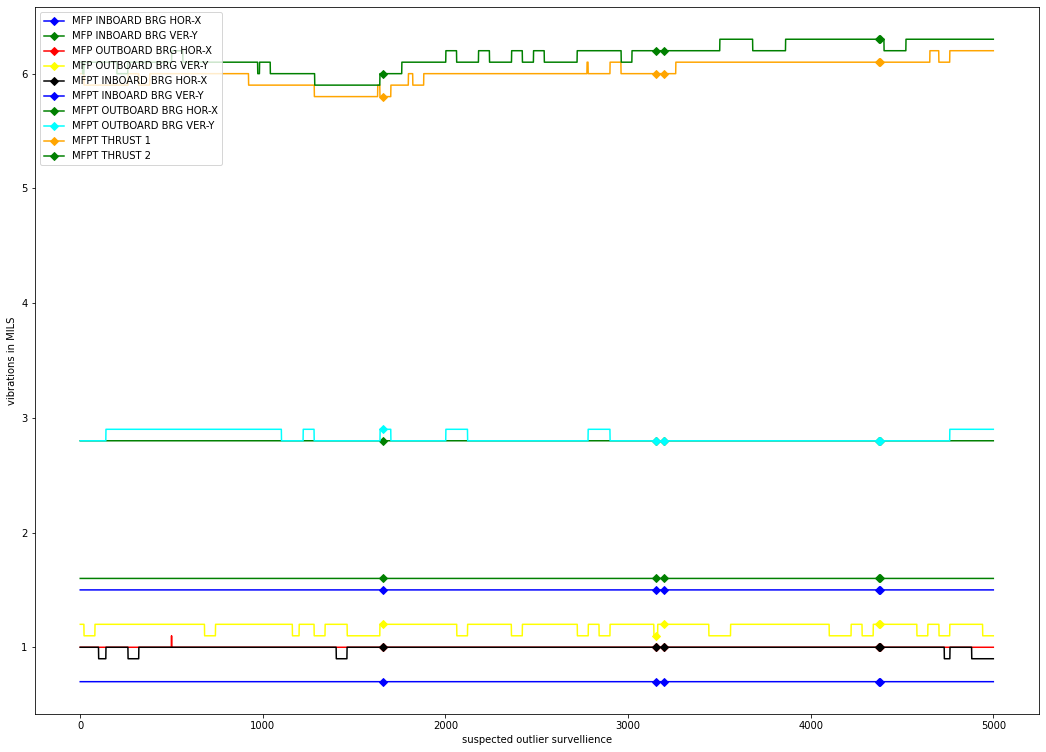

In [ ]:
1659, 3154, 3196, 4373, 4381

fig = plt.figure(figsize=(18,13))
ax = plt.axes()
x = np.linspace(0, 5000, 5000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_vib_all_year.iloc[25000:30000:,1:2].to_numpy().reshape(5000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,2:3].to_numpy().reshape(5000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='green') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,3:4].to_numpy().reshape(5000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='red') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,4:5].to_numpy().reshape(5000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='yellow')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,5:6].to_numpy().reshape(5000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='black')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,6:7].to_numpy().reshape(5000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,7:8].to_numpy().reshape(5000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[1659, 3154, 3196, 4373, 4381], marker='D',  color='green')
plt.plot(x, df_vib_all_year.iloc[25000:30000:,8:9].to_numpy().reshape(5000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='cyan')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,10:11].to_numpy().reshape(5000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[1659, 3154, 3196, 4373, 4381], marker='D',color='orange')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,11:12].to_numpy().reshape(5000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='green')
ax.legend(loc='upper left')
plt.show()

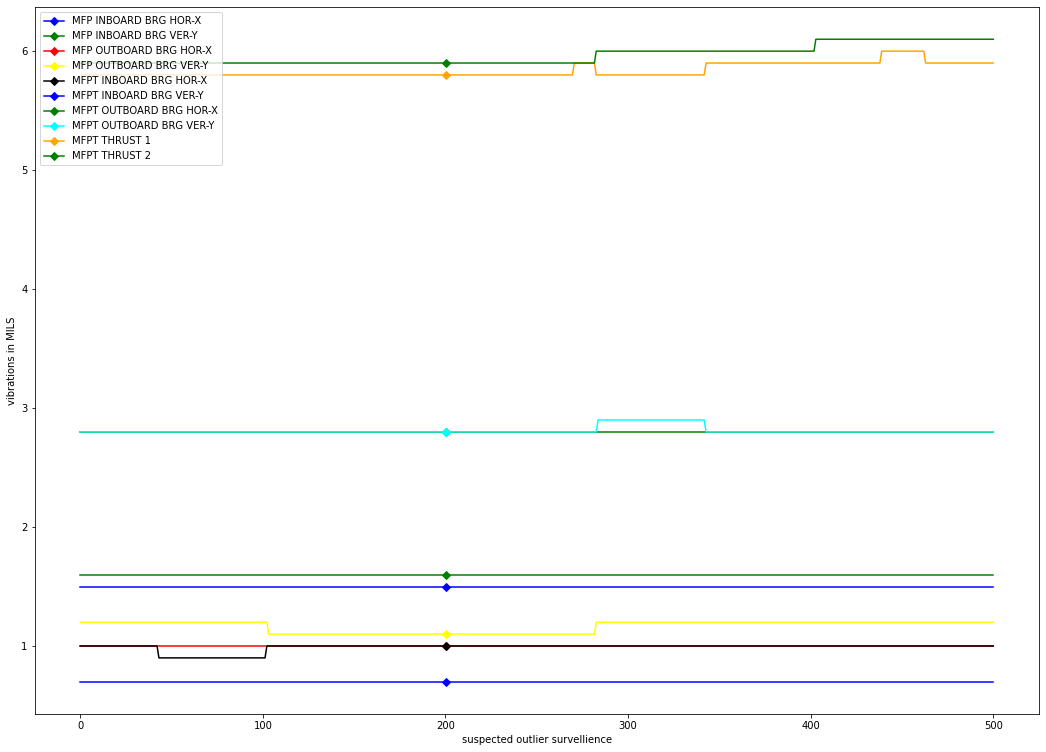

In [ ]:
fig = plt.figure(figsize=(18,13))
ax = plt.axes()
x = np.linspace(0, 500, 500) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_vib_all_year.iloc[26359:26859:,1:2].to_numpy().reshape(500,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[200], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[26359:26859:,2:3].to_numpy().reshape(500,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[200], marker='D', color='green') 
plt.plot(x, df_vib_all_year.iloc[26359:26859:,3:4].to_numpy().reshape(500,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[200], marker='D', color='red') 
plt.plot(x, df_vib_all_year.iloc[26359:26859:,4:5].to_numpy().reshape(500,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[200], marker='D', color='yellow')  
plt.plot(x, df_vib_all_year.iloc[26359:26859:,5:6].to_numpy().reshape(500,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[200], marker='D', color='black')  
plt.plot(x, df_vib_all_year.iloc[26359:26859:,6:7].to_numpy().reshape(500,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[200], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[26359:26859:,7:8].to_numpy().reshape(500,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[200], marker='D',  color='green')
plt.plot(x, df_vib_all_year.iloc[26359:26859:,8:9].to_numpy().reshape(500,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[200], marker='D', color='cyan')  
plt.plot(x, df_vib_all_year.iloc[26359:26859:,10:11].to_numpy().reshape(500,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[200], marker='D',color='orange')  
plt.plot(x, df_vib_all_year.iloc[26359:26859:,11:12].to_numpy().reshape(500,),label='MFPT THRUST 2' , linestyle='solid', markevery=[200], marker='D', color='green')
ax.legend(loc='upper left')
plt.show()

In [ ]:
25000+1659

26659

In [ ]:
1659, 3154, 3196, 4373, 4381

fig = plt.figure(figsize=(18,13))
ax = plt.axes()
x = np.linspace(0, 5000, 5000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_vib_all_year.iloc[25000:30000:,1:2].to_numpy().reshape(5000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,2:3].to_numpy().reshape(5000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='green') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,3:4].to_numpy().reshape(5000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='red') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,4:5].to_numpy().reshape(5000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='yellow')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,5:6].to_numpy().reshape(5000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='black')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,6:7].to_numpy().reshape(5000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[25000:30000:,7:8].to_numpy().reshape(5000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[1659, 3154, 3196, 4373, 4381], marker='D',  color='green')
plt.plot(x, df_vib_all_year.iloc[25000:30000:,8:9].to_numpy().reshape(5000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='cyan')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,10:11].to_numpy().reshape(5000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[1659, 3154, 3196, 4373, 4381], marker='D',color='orange')  
plt.plot(x, df_vib_all_year.iloc[25000:30000:,11:12].to_numpy().reshape(5000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[1659, 3154, 3196, 4373, 4381], marker='D', color='green')
ax.legend(loc='upper left')
plt.show()

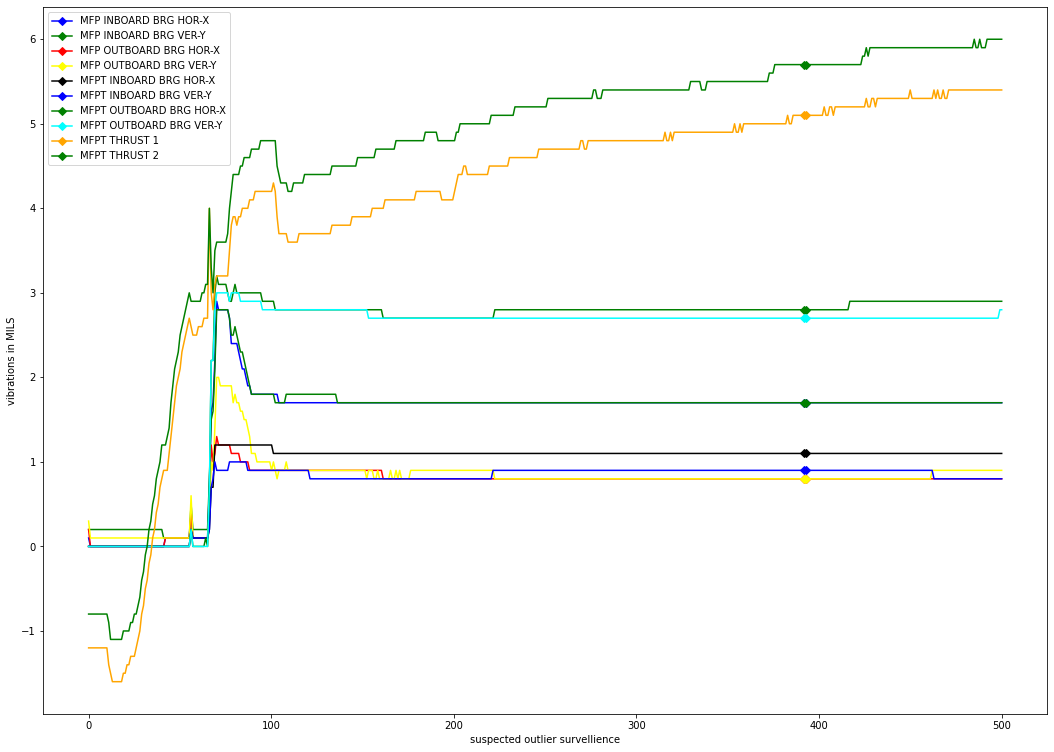

2286891

In [ ]:
fig = plt.figure(figsize=(18,13))
ax = plt.axes()
x = np.linspace(0, 500, 500) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,1:2].to_numpy().reshape(500,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[391, 392], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,2:3].to_numpy().reshape(500,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[391, 392], marker='D', color='green') 
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,3:4].to_numpy().reshape(500,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[391, 392], marker='D', color='red') 
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,4:5].to_numpy().reshape(500,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[391, 392], marker='D', color='yellow')  
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,5:6].to_numpy().reshape(500,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[391, 392], marker='D', color='black')  
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,6:7].to_numpy().reshape(500,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[391, 392], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,7:8].to_numpy().reshape(500,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[391, 392], marker='D',  color='green')
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,8:9].to_numpy().reshape(500,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[391, 392], marker='D', color='cyan')  
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,10:11].to_numpy().reshape(500,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[391, 392], marker='D',color='orange')  
plt.plot(x, df_vib_all_year.iloc[2286500:2287000:,11:12].to_numpy().reshape(500,),label='MFPT THRUST 2' , linestyle='solid', markevery=[391, 392], marker='D', color='green')
ax.legend(loc='upper left')
plt.show()

2286891

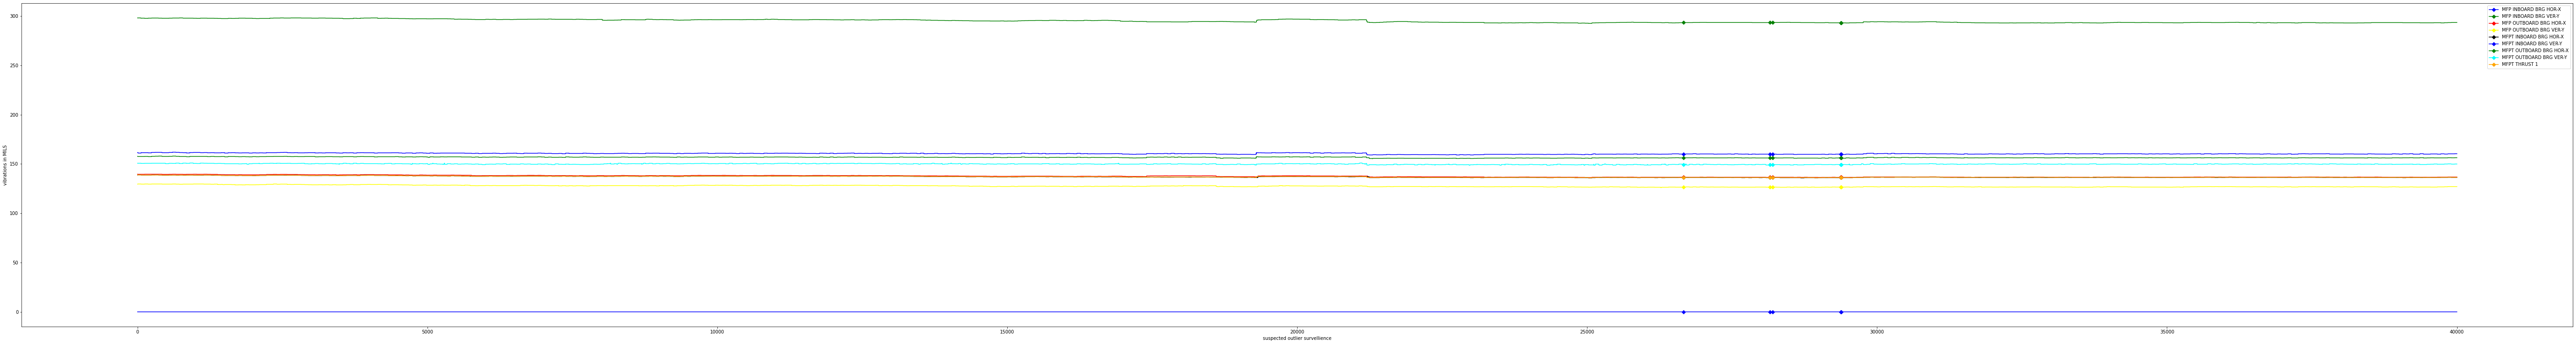

In [ ]:
fig = plt.figure(figsize=(100,13))
ax = plt.axes()
x = np.linspace(0, 40000, 40000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_temp_all_year.iloc[0:40000:,1:2].to_numpy().reshape(40000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='blue') 
plt.plot(x, df_temp_all_year.iloc[0:40000:,2:3].to_numpy().reshape(40000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='green') 
plt.plot(x, df_temp_all_year.iloc[0:40000:,3:4].to_numpy().reshape(40000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='red') 
plt.plot(x, df_temp_all_year.iloc[0:40000:,4:5].to_numpy().reshape(40000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='yellow')  
plt.plot(x, df_temp_all_year.iloc[0:40000:,5:6].to_numpy().reshape(40000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='black')  
plt.plot(x, df_temp_all_year.iloc[0:40000:,6:7].to_numpy().reshape(40000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='blue') 
plt.plot(x, df_temp_all_year.iloc[0:40000:,7:8].to_numpy().reshape(40000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[26659,   28154,   28196,   29373,   29381], marker='D',  color='green')
plt.plot(x, df_temp_all_year.iloc[0:40000:,8:9].to_numpy().reshape(40000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='cyan')  
plt.plot(x, df_temp_all_year.iloc[0:40000:,9:10].to_numpy().reshape(40000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[26659,   28154,   28196,   29373,   29381], marker='D',color='orange')  
#plt.plot(x, df_temp_all_year.iloc[0:40000:,11:12].to_numpy().reshape(40000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[26659,   28154,   28196,   29373,   29381], marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

ValueError: ignored

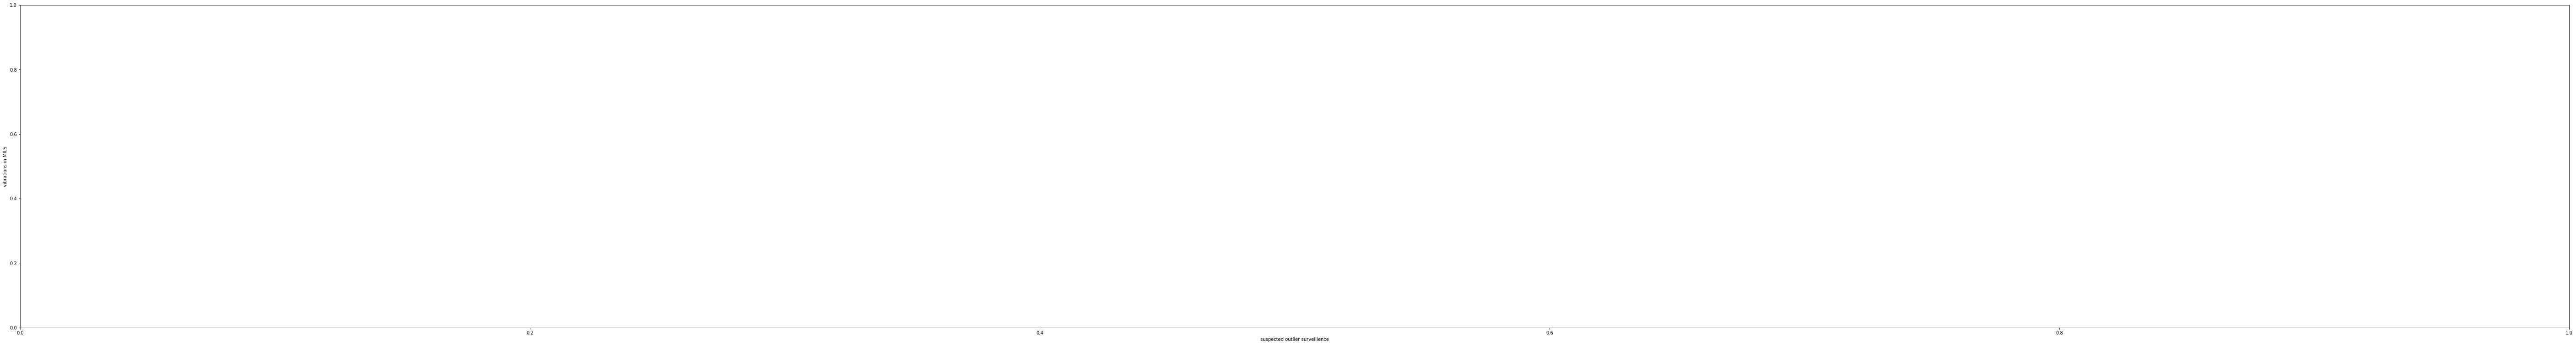

In [ ]:
fig = plt.figure(figsize=(100,13))
ax = plt.axes()
x = np.linspace(0, 10000, 10000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,1:2].to_numpy().reshape(10000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[5877,  7650,  8715], marker='D', color='blue') 
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,2:3].to_numpy().reshape(10000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green') 
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,3:4].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='red') 
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,4:5].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D', color='yellow')  
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,5:6].to_numpy().reshape(10000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='black')  
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,6:7].to_numpy().reshape(10000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='blue') 
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,7:8].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D',  color='green')
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,8:9].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='cyan')  
plt.plot(x, normalized_df_vibration['rpm_sensor'].head(10000).to_numpy().reshape(10000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[5877,  7650,  8715], marker='D',color='orange')  
#plt.plot(x, df_vib_all_year.iloc[575000:585000:,11:12].to_numpy().reshape(10000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
df_vib_all_year.iloc[575000:585000:,:]

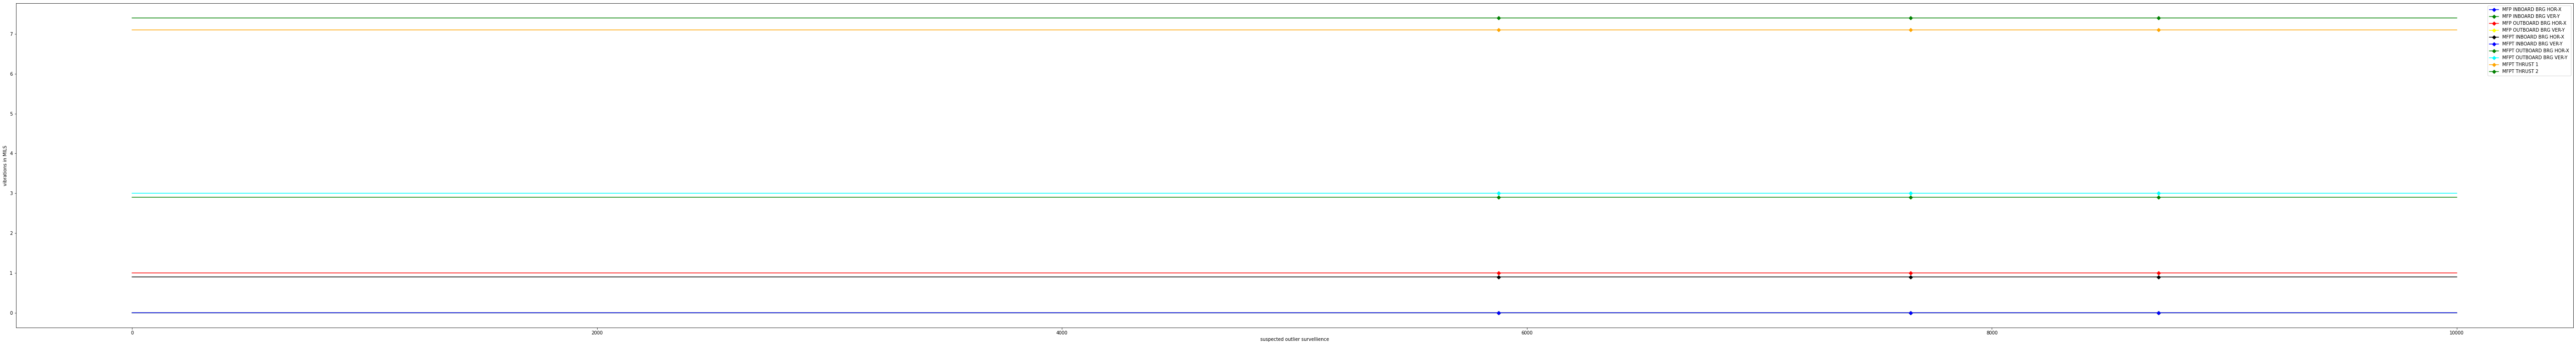

In [ ]:
fig = plt.figure(figsize=(100,13))
ax = plt.axes()
x = np.linspace(0, 10000, 10000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_vib_all_year.iloc[575000:585000:,1:2].to_numpy().reshape(10000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[5877,  7650,  8715], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[575000:585000:,2:3].to_numpy().reshape(10000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green') 
plt.plot(x, df_vib_all_year.iloc[575000:585000:,3:4].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='red') 
plt.plot(x, df_vib_all_year.iloc[575000:585000:,4:5].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D', color='yellow')  
plt.plot(x, df_vib_all_year.iloc[575000:585000:,5:6].to_numpy().reshape(10000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='black')  
plt.plot(x, df_vib_all_year.iloc[575000:585000:,6:7].to_numpy().reshape(10000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='blue') 
plt.plot(x, df_vib_all_year.iloc[575000:585000:,7:8].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D',  color='green')
plt.plot(x, df_vib_all_year.iloc[575000:585000:,8:9].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='cyan')  
plt.plot(x, df_vib_all_year.iloc[575000:585000:,10:11].to_numpy().reshape(10000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[5877,  7650,  8715], marker='D',color='orange')  
plt.plot(x, df_vib_all_year.iloc[575000:585000:,11:12].to_numpy().reshape(10000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(100,13))
ax = plt.axes()
x = np.linspace(0, 10000, 10000) 
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,1:2].to_numpy().reshape(10000,), label='MFP INBOARD BRG HOR-X' ,  linestyle='solid',  markevery=[5877,  7650,  8715], marker='D', color='blue') 
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,2:3].to_numpy().reshape(10000,),label='MFP INBOARD BRG VER-Y ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green') 
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,3:4].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG HOR-X' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='red') 
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,4:5].to_numpy().reshape(10000,),label='MFP OUTBOARD BRG VER-Y' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D', color='yellow')  
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,5:6].to_numpy().reshape(10000,),label='MFPT INBOARD BRG HOR-X ' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='black')  
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,6:7].to_numpy().reshape(10000,),label='MFPT INBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='blue') 
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,7:8].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='solid',markevery=[5877,  7650,  8715], marker='D',  color='green')
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,8:9].to_numpy().reshape(10000,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='cyan')  
plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,10:11].to_numpy().reshape(10000,),label='MFPT THRUST 1' , linestyle='solid',  markevery=[5877,  7650,  8715], marker='D',color='orange')  
#plt.plot(x, df_temp_all_year.iloc[ 575000:585000:,11:12].to_numpy().reshape(10000,),label='MFPT THRUST 2' , linestyle='solid', markevery=[5877,  7650,  8715], marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
df_vib_all_year.iloc[575000:585000:,1:2]

In [ ]:
fig = plt.figure(figsize=(120,9))
ax = plt.axes()
x = np.linspace(0, 844, 844) 
markers_on = [0,1]
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, normalized_df_vibration.x1.to_numpy().reshape(844,), label='MFP INBOARD BRG HOR-X' , linestyle='--',  marker='D', ms = 20, color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='D', color='green') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='red') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='yellow')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='D', color='black')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='D', color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='green')
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='cyan')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 1' , linestyle='--', marker='D', color='orange')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 2' , linestyle='--', marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844, 844) 
markers_on = [0,1]
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, normalized_df_vibration.x1.to_numpy().reshape(844,), label='MFP INBOARD BRG HOR-X' , linestyle='--', markevery=[3,4,5,6,76,8,9], marker='D', ms = 20, color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='D', color='green') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='red') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='yellow')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='D', color='black')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='D', color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='green')
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='cyan')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 1' , linestyle='--', marker='D', color='orange')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 2' , linestyle='--', marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
normalized_df_vibration.shape

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844, 844) 
markers_on = [0,1]
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, normalized_df_vibration.x1.to_numpy().reshape(844,), label='MFP INBOARD BRG HOR-X' , linestyle='--', markevery=[3,4,5,6,76,8,9], marker='D', ms = 20, color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='D', color='green') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='red') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='yellow')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='D', color='black')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='D', color='blue') 
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='green')
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='cyan')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 1' , linestyle='--', marker='D', color='orange')  
plt.plot(x, normalized_df_vibration.to_numpy().reshape(844,),label='MFPT THRUST 2' , linestyle='--', marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
outliers_index_05

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
markers_on = [0,1]
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[0:1,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' ,  linestyle='--', markevery=[0,1], marker='D', color='blue') 
plt.plot(x, train_test_totals.iloc[0:1,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='D', color='green') 
plt.plot(x, train_test_totals.iloc[0:1,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='red') 
plt.plot(x, train_test_totals.iloc[0:1,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='yellow')  
plt.plot(x, train_test_totals.iloc[0:1,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='D', color='black')  
plt.plot(x, train_test_totals.iloc[0:1,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='D', color='blue') 
plt.plot(x, train_test_totals.iloc[0:1,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='D', color='green')
plt.plot(x, train_test_totals.iloc[0:1,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='D', color='cyan')  
plt.plot(x, train_test_totals.iloc[0:1,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='D', color='orange')  
plt.plot(x, train_test_totals.iloc[0:1,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='D', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('normal survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[1:2,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[1:2,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[1:2,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[1:2,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[1:2,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[1:2,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[1:2,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[1:2,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[1:2,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[1:2,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
normalized_df_vibration

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[68:69,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[68:69,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[68:69,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[68:69,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[68:69,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[68:69,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[68:69,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[68:69,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[68:69,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[68:69,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('normal survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[69:70,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[69:70,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[69:70,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[69:70,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[69:70,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[69:70,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[69:70,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[69:70,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[69:70,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[69:70,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[104:105,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[104:105,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[104:105,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[104:105,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[104:105,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[104:105,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[104:105,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[104:105,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[104:105,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[104:105,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('normal survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[105:106,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[105:106,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[105:106,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[105:106,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[105:106,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[105:106,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[105:106,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[105:106,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[105:106,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[105:106,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('suspected outlier survellience') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[153:154,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[153:154,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[153:154,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[153:154,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[153:154,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[153:154,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[153:154,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[153:154,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[153:154,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[153:154,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[0:1,0:10].to_numpy().reshape(10,), label='MAIN FEEDPUMP B INBOARD BRG' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[0:1,10:20].to_numpy().reshape(10,),label='MAIN FEEDPUMP B OUTBOARD BRG' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals_temp.iloc[0:1,20:30].to_numpy().reshape(10,),label='MAIN FEEDPUMP B THRUST BRG' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals_temp.iloc[0:1,30:40].to_numpy().reshape(10,),label='MFPT B OIL COOLER INLET OIL ' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[0:1,40:50].to_numpy().reshape(10,),label='MFPT B THRUST BRG DRAIN OIL ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals_temp.iloc[0:1,50:60].to_numpy().reshape(10,),label='MFPT B REVERSE THRUST BEARING' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[0:1,60:70].to_numpy().reshape(10,),label='MFPT B HIGH PRESSURE STOP VALVE ' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals_temp.iloc[0:1,70:80].to_numpy().reshape(10,),label='MFPT B NORMAL THRUST BEARING' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[0:1,80:90].to_numpy().reshape(10,),label='MFPT B #1 BEARING DRAIN OIL ' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals_temp.iloc[0:1,90:100].to_numpy().reshape(10,),label='MFPT B #2 BEARING DRAIN OIL' , linestyle='--', marker='o', color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[10:11,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[10:11,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[10:11,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[10:11,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[10:11,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[10:11,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[10:11,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[10:11,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[10:11,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[10:11,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[10:11,0:10].to_numpy().reshape(10,), label='MAIN FEEDPUMP B INBOARD BRG' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[10:11,10:20].to_numpy().reshape(10,),label='MAIN FEEDPUMP B OUTBOARD BRG' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals_temp.iloc[10:11,20:30].to_numpy().reshape(10,),label='MAIN FEEDPUMP B THRUST BRG' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals_temp.iloc[10:11,30:40].to_numpy().reshape(10,),label='MFPT B OIL COOLER INLET OIL ' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[10:11,40:50].to_numpy().reshape(10,),label='MFPT B THRUST BRG DRAIN OIL ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals_temp.iloc[10:11,50:60].to_numpy().reshape(10,),label='MFPT B REVERSE THRUST BEARING' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[10:11,60:70].to_numpy().reshape(10,),label='MFPT B HIGH PRESSURE STOP VALVE ' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals_temp.iloc[10:11,70:80].to_numpy().reshape(10,),label='MFPT B NORMAL THRUST BEARING' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[10:11,80:90].to_numpy().reshape(10,),label='MFPT B #1 BEARING DRAIN OIL ' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals_temp.iloc[10:11,90:100].to_numpy().reshape(10,),label='MFPT B #2 BEARING DRAIN OIL' , linestyle='--', marker='o', color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, train_test_totals.iloc[34:35,0:10].to_numpy().reshape(10,), label='MFP INBOARD BRG HOR-X' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,10:20].to_numpy().reshape(10,),label='MFP INBOARD BRG VER-Y ' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals.iloc[34:35,20:30].to_numpy().reshape(10,),label='MFP OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals.iloc[34:35,30:40].to_numpy().reshape(10,),label='MFP OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals.iloc[34:35,40:50].to_numpy().reshape(10,),label='MFPT INBOARD BRG HOR-X ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals.iloc[34:35,50:60].to_numpy().reshape(10,),label='MFPT INBOARD BRG VER-Y' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,60:70].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG HOR-X' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals.iloc[34:35,70:80].to_numpy().reshape(10,),label='MFPT OUTBOARD BRG VER-Y' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals.iloc[34:35,90:100].to_numpy().reshape(10,),label='MFPT THRUST 1' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals.iloc[34:35,100:110].to_numpy().reshape(10,),label='MFPT THRUST 2' , linestyle='--', marker='o', color='green')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[34:35,0:10].to_numpy().reshape(10,), label='MAIN FEEDPUMP B INBOARD BRG' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,10:20].to_numpy().reshape(10,),label='MAIN FEEDPUMP B OUTBOARD BRG' , linestyle='--', marker='o', color='green') 
plt.plot(x, train_test_totals_temp.iloc[34:35,20:30].to_numpy().reshape(10,),label='MAIN FEEDPUMP B THRUST BRG' , linestyle='--', marker='o', color='red') 
plt.plot(x, train_test_totals_temp.iloc[34:35,30:40].to_numpy().reshape(10,),label='MFPT B OIL COOLER INLET OIL ' , linestyle='--', marker='o', color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[34:35,40:50].to_numpy().reshape(10,),label='MFPT B THRUST BRG DRAIN OIL ' , linestyle='--', marker='o', color='black')  
plt.plot(x, train_test_totals_temp.iloc[34:35,50:60].to_numpy().reshape(10,),label='MFPT B REVERSE THRUST BEARING' , linestyle='--', marker='o', color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,60:70].to_numpy().reshape(10,),label='MFPT B HIGH PRESSURE STOP VALVE ' , linestyle='--', marker='o', color='green')
plt.plot(x, train_test_totals_temp.iloc[34:35,70:80].to_numpy().reshape(10,),label='MFPT B NORMAL THRUST BEARING' , linestyle='--', marker='o', color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[34:35,80:90].to_numpy().reshape(10,),label='MFPT B #1 BEARING DRAIN OIL ' , linestyle='--', marker='o', color='orange')  
plt.plot(x, train_test_totals_temp.iloc[34:35,90:100].to_numpy().reshape(10,),label='MFPT B #2 BEARING DRAIN OIL' , linestyle='--', marker='o', color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')
plt.show()

In [ ]:
train_test_totals_temp.iloc[0:1,110:121]

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[1:2,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[1:2,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[1:2,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[1:2,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[1:2,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[1:2,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[1:2,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[1:2,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[1:2,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[1:2,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[1:2,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[1:2,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[1:2,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[1:2,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[1:2,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[1:2,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[1:2,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[1:2,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[1:2,88:99].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[1:2,99:110].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)

         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[2:3,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[2:3,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[2:3,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[2:3,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[2:3,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[2:3,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[2:3,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[2:3,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[2:3,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[2:3,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[2:3,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[2:3,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[2:3,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[2:3,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[2:3,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[2:3,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[2:3,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[2:3,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[2:3,88:99].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[2:3,99:110].to_numpy().reshape(11,),label='x10' , color='green')  
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 10,10)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
#plt.plot(x, train_test_totals_temp.iloc[2:3,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
#plt.plot(x, train_test_totals_temp.iloc[2:3,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
#plt.plot(x, train_test_totals_temp.iloc[2:3,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
#plt.plot(x, train_test_totals_temp.iloc[2:3,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
#plt.plot(x, train_test_totals_temp.iloc[2:3,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
#plt.plot(x, train_test_totals_temp.iloc[2:3,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
#plt.plot(x, train_test_totals_temp.iloc[2:3,66:77].to_numpy().reshape(11,),label='x7' , color='green')
#plt.plot(x, train_test_totals_temp.iloc[2:3,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[2:3,88:99].to_numpy().reshape(10,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[2:3,99:110].to_numpy().reshape(11,),label='x10' , color='green')  
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[3:4,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[3:4,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[3:4,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[3:4,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[3:4,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[3:4,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[3:4,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[3:4,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[3:4,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[3:4,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[3:4,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[3:4,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[3:4,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[3:4,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[3:4,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[3:4,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[3:4,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[3:4,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[3:4,88:99].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[3:4,99:110].to_numpy().reshape(11,),label='x10' , color='green')  
plt.plot(x, train_test_totals_temp.iloc[3:4,110:121].to_numpy().reshape(11,),label='x11' , color='red')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[32:33,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[32:33,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[32:33,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[32:33,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[32:33,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[32:33,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[32:33,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[32:33,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[32:33,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[32:33,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[3:4,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[3:4,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[3:4,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[3:4,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[3:4,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[3:4,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[3:4,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[3:4,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[3:4,88:99].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[3:4,99:110].to_numpy().reshape(11,),label='x10' , color='green')  
plt.plot(x, train_test_totals_temp.iloc[3:4,110:121].to_numpy().reshape(11,),label='x11' , color='red')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
train_test_totals_temp

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[33:34,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[33:34,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[33:34,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[33:34,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[33:34,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[33:34,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[33:34,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[33:34,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[33:34,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[33:34,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[33:34,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[33:34,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[33:34,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[33:34,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[33:34,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[33:34,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[33:34,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[33:34,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[33:34,88:99].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[33:34,99:110].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals_temp.iloc[33:34,110:121].to_numpy().reshape(11,),label='x11' , color='green')           # short color code (rgbcmyk)

         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[34:35,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[34:35,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[34:35,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[34:35,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[34:35,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[34:35,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[34:35,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[34:35,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[34:35,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[34:35,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[34:35,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[34:35,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[34:35,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[34:35,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[34:35,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[34:35,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[34:35,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[34:35,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[34:35,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[34:35,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[34:35,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[34:35,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[34:35,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[34:35,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[34:35,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[34:35,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[34:35,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[34:35,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[34:35,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[34:35,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[34:35,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[34:35,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[34:35,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[34:35,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes one instance associated with suspected anomalous survellience') 
plt.ylabel('vibrations in MILS ')      # specify color by name
plt.plot(x, train_test_totals.iloc[68:69,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[68:69,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[68:69,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[68:69,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[68:69,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[68:69,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[68:69,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[68:69,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[68:69,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[68:69,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[68:69,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[68:69,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[68:69,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[68:69,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[68:69,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[68:69,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[68:69,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[68:69,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[68:69,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[68:69,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[69:70,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[69:70,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[69:70,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[69:70,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[69:70,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[69:70,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[69:70,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[69:70,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[69:70,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[69:70,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[69:70,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[69:70,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[69:70,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[69:70,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[69:70,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[69:70,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[69:70,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[69:70,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[69:70,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[69:70,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[70:71,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[70:71,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[70:71,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[70:71,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[70:71,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[70:71,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[70:71,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[70:71,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[70:71,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[70:71,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[70:71,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[70:71,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[70:71,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[70:71,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[70:71,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[70:71,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[70:71,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[70:71,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[70:71,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[70:71,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
svm_outlier_05

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[190:191,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[190:191,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[190:191,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[190:191,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[190:191,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[190:191,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[190:191,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[190:191,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[190:191,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[190:191,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[190:191,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[190:191,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[190:191,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[190:191,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[190:191,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[190:191,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[190:191,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[190:191,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[190:191,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[190:191,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[191:192,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[191:192,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[191:192,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[191:192,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[191:192,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[191:192,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[191:192,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[191:192,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[191:192,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[191:192,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[191:192,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[191:192,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[191:192,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[191:192,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[191:192,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[191:192,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[191:192,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[191:192,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[191:192,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[191:192,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[192:193,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[192:193,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[192:193,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[192:193,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[192:193,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[192:193,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[192:193,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[192:193,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[192:193,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[192:193,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[192:193,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[192:193,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[192:193,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[192:193,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[192:193,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[192:193,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[192:193,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[192:193,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[192:193,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[192:193,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[200:201,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[200:201,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[200:201,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[200:201,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[200:201,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[200:201,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[200:201,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[200:201,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[200:201,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[200:201,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[200:201,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[200:201,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[200:201,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[200:201,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[200:201,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[200:201,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[200:201,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[200:201,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[200:201,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[200:201,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[201:202,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[201:202,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[201:202,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[201:202,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[201:202,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[201:202,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[201:202,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[201:202,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[201:202,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[201:202,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 11,11)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[201:202,0:11].to_numpy().reshape(11,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[201:202,11:22].to_numpy().reshape(11,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[201:202,22:33].to_numpy().reshape(11,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[201:202,33:44].to_numpy().reshape(11,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[201:202,44:55].to_numpy().reshape(11,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[201:202,55:66].to_numpy().reshape(11,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[201:202,66:77].to_numpy().reshape(11,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[201:202,77:88].to_numpy().reshape(11,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp.iloc[201:202,99:110].to_numpy().reshape(11,),label='x9' , color='orange')  
plt.plot(x, train_test_totals_temp.iloc[201:202,110:121].to_numpy().reshape(11,),label='x10' , color='green')           # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
           # short color code (rgbcmyk)
          # short color code (rgbcmyk)
         # short color code (rgbcmyk)
         # short color code (rgbcmyk)
          # short color code (rgbcmyk)
          # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn import preprocessing
train_test_totals_temp1=train_test_totals_temp.copy().astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_test_totals_temp1)
cols=train_test_totals_temp1.columns
train_test_totals_temp1 = pd.DataFrame(np_scaled, columns=cols)
train_test_totals_temp1.describe()

In [ ]:
a=[0,  34,  68, 80, 94, 104, 127, 141, 153, 172, 185, 201, 250, 289, 331, 378, 464, 500, 522, 531, 584, 828]
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 242 ,242 )
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[a,0:11].to_numpy().reshape(242,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[a,11:22].to_numpy().reshape(242,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[a,22:33].to_numpy().reshape(242,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[a,33:44].to_numpy().reshape(242,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[a,44:55].to_numpy().reshape(242,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[a,88:99].to_numpy().reshape(242,),label='x8' , color='blue')  
plt.plot(x, train_test_totals_temp.iloc[a,77:88].to_numpy().reshape(242,),label='x9' , color='red') 
plt.show()

In [ ]:
b=[  1,    11,   21,   31,  41,
          51,   61, 71,  81, 91,  101,111,121, 131, 142, 154, 164, 176, 192, 203, 213, 224, 234,
         244, 254,264, 274,284, 294,304,314, 325, 336, 346,356,366, 376, 386, 396,406, 416,426, 436, 446, 456, 469,  
         479, 489, 499, 511, 521, 532, 542,552, 562, 572, 582, 592, 602, 613, 623, 633, 643, 
         654, 664, 674, 684, 694, 704, 714,724,734, 744,754, 764,774, 784, 794, 804,814, 824, 834, 843]
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 913 ,913 )
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[b,0:11].to_numpy().reshape(913,), label='x1' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[b,11:22].to_numpy().reshape(913,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp.iloc[b,22:33].to_numpy().reshape(913,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp.iloc[b,33:44].to_numpy().reshape(913,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp.iloc[b,44:55].to_numpy().reshape(913,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp.iloc[b,88:99].to_numpy().reshape(913,),label='x8' , color='blue')  
plt.plot(x, train_test_totals_temp.iloc[b,77:88].to_numpy().reshape(913,),label='x9' , color='red') 
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 242,242)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[a,0:11].to_numpy().reshape(242,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[a,11:22].to_numpy().reshape(242,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[a,22:33].to_numpy().reshape(242,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[a,33:44].to_numpy().reshape(242,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[a,44:55].to_numpy().reshape(242,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[a,55:66].to_numpy().reshape(242,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[a,66:77].to_numpy().reshape(242,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[a,77:88].to_numpy().reshape(242,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[a,99:110].to_numpy().reshape(242,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[a,110:121].to_numpy().reshape(242,),label='x10' , color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 913,913)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[b,0:11].to_numpy().reshape(913,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[b,11:22].to_numpy().reshape(913,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[b,22:33].to_numpy().reshape(913,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[b,33:44].to_numpy().reshape(913,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[b,44:55].to_numpy().reshape(913,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[b,55:66].to_numpy().reshape(913,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[b,66:77].to_numpy().reshape(913,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[b,77:88].to_numpy().reshape(913,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[b,99:110].to_numpy().reshape(913,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[b,110:121].to_numpy().reshape(913,),label='x10' , color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 242 ,242 )
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[a,66:77].to_numpy().reshape(242,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[a,110:121].to_numpy().reshape(242,),label='x11' , color='black')
plt.plot(x, train_test_totals_temp.iloc[a,55:66].to_numpy().reshape(242,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[a,99:110].to_numpy().reshape(242,),label='x10' , color='black')          

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 913 ,913 )
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp.iloc[b,66:77].to_numpy().reshape(913,),label='x7' , color='green')
plt.plot(x, train_test_totals_temp.iloc[b,110:121].to_numpy().reshape(913,),label='x11' , color='black')
plt.plot(x, train_test_totals_temp.iloc[b,55:66].to_numpy().reshape(913,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp.iloc[b,99:110].to_numpy().reshape(913,),label='x10' , color='black')          

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 913,913)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals.iloc[b,0:11].to_numpy().reshape(913,), label='x1' , color='blue') 
plt.plot(x, train_test_totals.iloc[b,11:22].to_numpy().reshape(913,),label='x2' , color='green') 
plt.plot(x, train_test_totals.iloc[b,22:33].to_numpy().reshape(913,),label='x3' , color='red') 
plt.plot(x, train_test_totals.iloc[b,33:44].to_numpy().reshape(913,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals.iloc[b,44:55].to_numpy().reshape(913,),label='x5' , color='black')  
plt.plot(x, train_test_totals.iloc[b,55:66].to_numpy().reshape(913,),label='x6' , color='blue') 
plt.plot(x, train_test_totals.iloc[b,66:77].to_numpy().reshape(913,),label='x7' , color='green')
plt.plot(x, train_test_totals.iloc[b,77:88].to_numpy().reshape(913,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals.iloc[b,99:110].to_numpy().reshape(913,),label='x9' , color='orange')  
plt.plot(x, train_test_totals.iloc[b,110:121].to_numpy().reshape(913,),label='x10' , color='green')           # short color code (rgbcmyk)
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 22,22)
plt.xlabel('minutes') 
plt.ylabel('vibrations in MILS')      # specify color by name
plt.plot(x, df_train_test_totals[['x1']].iloc[a,:].to_numpy().reshape(22,), label='x1' , color='blue') 
#plt.plot(x, df_train_test_totals[['x2']].iloc[a,:].to_numpy().reshape(22,),label='x2' , color='green') 
plt.plot(x, df_train_test_totals[['x3']].iloc[a,:].to_numpy().reshape(22,),label='x3' , color='red') 
plt.plot(x, df_train_test_totals[['x4']].iloc[a,:].to_numpy().reshape(22,),label='x4' , color='yellow')  
plt.plot(x, df_train_test_totals[['x5']].iloc[a,:].to_numpy().reshape(22,),label='x5' , color='black')  
plt.plot(x, df_train_test_totals[['x6']].iloc[a,:].to_numpy().reshape(22,),label='x6' , color='blue') 
plt.plot(x, df_train_test_totals[['x7']].iloc[a,:].to_numpy().reshape(22,),label='x7' , color='green')
plt.plot(x, df_train_test_totals[['x8']].iloc[a,:].to_numpy().reshape(22,),label='x8' , color='cyan')  
#plt.plot(x, df_train_test_totals[['x10']].iloc[a,:].to_numpy().reshape(22,),label='x10' , color='green') 
plt.plot(x, df_train_test_totals[['param_overall_MILS']].iloc[a,:].to_numpy().reshape(22,),label='overall' , color='red')   
plt.plot(x, df_train_test_totals[['param5_MILS']].iloc[a,:].to_numpy().reshape(22,),label='param 5' , color='black')  
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 83,83)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, df_train_test_totals[['x1']].iloc[b,:].to_numpy().reshape(83,), label='x1' , color='blue') 
#plt.plot(x, df_train_test_totals[['x2']].iloc[b,:].to_numpy().reshape(83,),label='x2' , color='green') 
plt.plot(x, df_train_test_totals[['x3']].iloc[b,:].to_numpy().reshape(83,),label='x3' , color='red') 
plt.plot(x, df_train_test_totals[['x4']].iloc[b,:].to_numpy().reshape(83,),label='x4' , color='yellow')  
plt.plot(x, df_train_test_totals[['x5']].iloc[b,:].to_numpy().reshape(83,),label='x5' , color='black')  
plt.plot(x, df_train_test_totals[['x6']].iloc[b,:].to_numpy().reshape(83,),label='x6' , color='blue') 
plt.plot(x, df_train_test_totals[['x7']].iloc[b,:].to_numpy().reshape(83,),label='x7' , color='green')
#plt.plot(x, df_train_test_totals[['x8']].iloc[b,:].to_numpy().reshape(83,),label='x8' , color='cyan')  
#plt.plot(x, df_train_test_totals[['x10']].iloc[b,:].to_numpy().reshape(83,),label='x10' , color='green') 
plt.plot(x, df_train_test_totals[['param_overall_MILS']].iloc[b,:].to_numpy().reshape(83,),label='overall' , color='red')   
plt.plot(x, df_train_test_totals[['param5_MILS']].iloc[b,:].to_numpy().reshape(83,),label='para1' , color='red')  
ax.legend(loc='upper right')

plt.show()

In [ ]:
train_test_totals_temp

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 83,83)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, train_test_totals_temp1[['x1']].iloc[b,:].to_numpy().reshape(83,), label='x1' , color='blue') 
#plt.plot(x, train_test_totals_temp1[['x2']].iloc[b,:].to_numpy().reshape(83,),label='x2' , color='green') 
plt.plot(x, train_test_totals_temp1[['x3']].iloc[b,:].to_numpy().reshape(83,),label='x3' , color='red') 
plt.plot(x, train_test_totals_temp1[['x4']].iloc[b,:].to_numpy().reshape(83,),label='x4' , color='yellow')  
plt.plot(x, train_test_totals_temp1[['x5']].iloc[b,:].to_numpy().reshape(83,),label='x5' , color='black')  
plt.plot(x, train_test_totals_temp1[['x6']].iloc[b,:].to_numpy().reshape(83,),label='x6' , color='blue') 
plt.plot(x, train_test_totals_temp1[['x7']].iloc[b,:].to_numpy().reshape(83,),label='x7' , color='green')
#plt.plot(x, train_test_totals_temp1[['x8']].iloc[b,:].to_numpy().reshape(83,),label='x8' , color='cyan')  
plt.plot(x, train_test_totals_temp1[['x10']].iloc[b,:].to_numpy().reshape(83,),label='x10' , color='green') 
plt.plot(x, normalized_df[['param_overall_MILS']].iloc[b,:].to_numpy().reshape(83,),label='overall' , color='red')   
plt.plot(x, normalized_df[['param5_MILS']].iloc[b,:].to_numpy().reshape(83,),label='para1' , color='red')  
ax.legend(loc='upper right')

plt.show()

In [ ]:
normalized_df.describe()

In [ ]:
df_train_test_totals[['x1']].iloc[a,:].to_numpy().reshape(22,)

In [ ]:
train_test_totals

In [ ]:
train_test_totals_temp.iloc[[svm_outlier_05],0:11]

In [ ]:
svm_outlier_05.shape

In [ ]:
plt.figure(figsize=(12,10))
cor = svm_normal_15[['x1','x2','x3','x4','x5','x6','x7','x8','x10','x11']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(12,10))
cor1 = svm_outlier_15[['x1','x2','x3','x4','x5','x6','x7','x8','x10','x11']].corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(12,10))
cor2 = svm_normal_15[['RPM','param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']].corr()
sns.heatmap(cor3, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(12,10))
cor3 = svm_outlier_15[['RPM','param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']].corr()
sns.heatmap(cor4, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
svm_normal_05.hist(figsize=(18,14))

In [ ]:
print(sum(abs(cor-cor1).sum(axis=0).tolist()))
print(sum(abs(cor2-cor3).sum(axis=0).tolist()))

In [ ]:
!pip install pingouin
from pingouin import multivariate_normality


In [ ]:
print(multivariate_normality(svm_normal_05[['RPM','param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']], alpha=.05))
print(multivariate_normality(svm_normal_10[['RPM','param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']], alpha=.05))
print(multivariate_normality(svm_normal_15[['RPM','param_overall_MILS','param1_MILS',
  'param2_MILS','param3_MILS','param4_MILS','param5_MILS','param6_MILS']], alpha=.05))


In [ ]:
svm_normal_05.shape

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 800,800)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, svm_normal_05['x1'], label='2T4048A' , color='blue') 
plt.plot(x, svm_normal_05['x2'],label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x3'], label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x4'],label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x5'], label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x6'], label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x7'],label='2T4145A' , color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x8'],label='2T2574A' , color='g')   
plt.plot(x, svm_normal_05['x10'],label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
plt.plot(x, svm_normal_05['x11'],label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 100,100)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, svm_normal_05['x1'].head(100), label='2T4048A' , color='blue') 
plt.plot(x, svm_normal_05['x2'].head(100),label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x3'].head(100), label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x4'].head(100),label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x5'].head(100), label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x6'].head(100), label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_normal_05['x7'].head(100),label='2T4145A' , color='black')           # short color code (rgbcmyk)
#plt.plot(x, svm_normal_05['x8'].head(100),label='2T2574A' , color='g')   
#plt.plot(x, svm_normal_05['x10'].head(100),label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
plt.plot(x, svm_normal_05['x11'].head(100),label='x11' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 44,44)
plt.xlabel('minutes') 
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, svm_outlier_05['x1'], label='2T4048A' , color='blue') 
plt.plot(x, svm_outlier_05['x2'],label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x3'], label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x4'],label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x5'], label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x6'], label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x7'],label='2T4145A' , color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_outlier_05['x8'],label='2T2574A' , color='g')   
plt.plot(x, svm_outlier_05['x10'],label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
plt.plot(x, svm_outlier_05['x11'],label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')
plt.show()

In [ ]:
svm_normals_05_y['c'] = svm_normals_05_y.apply(lambda svm_normals_05_y: svm_normals_05_y.A2V9005A + svm_normals_05_y.A2V9005A2 ,axis=1)
svm_normals_05_y.shape

In [ ]:
fn = lambda svm_normals_05_y: svm_normals_05_y.iloc[:,0]+svm_normals_05_y.iloc[:,11]+svm_normals_05_y.iloc[:,23]
+svm_normals_05_y.iloc[:,35]+ svm_normals_05_y.iloc[:,47]+svm_normals_05_y.iloc[:,59] # define a function for the new column
col = svm_normals_05_y.apply(fn, axis=1) # get column data with an index
svm_normals_05_y = svm_normals_05_y.assign(c=col.values) # assign values to column 'c'
svm_normals_05_y
colname

In [ ]:
pos = [0,11,23,35,47,59]
colname = svm_normals_05_y.columns[pos]
colname

In [ ]:
svm_normals_05_y.drop.columns

In [ ]:
svm_normals_05_y

In [ ]:
svm_normals_05_y.iloc[:,[0,11,23,35,47,59]]

In [ ]:
svm_outliers_30_x.describe()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 42,42)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, svm_outliers_05_x['A2V9005A'],label="A2V9005A", color='blue' ) 
plt.plot(x, svm_outliers_05_x['A2V9004A'],label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9007A'],label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9006A'],label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9015A'],label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9014A'],label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9017A'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9016A'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9019A'],label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9018A'],label="A2V9018A", color='g')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, svm_outliers_05_x['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_x['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 42,42)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
#plt.plot(x,svm_outliers_05_y['param_overall_MILS'],label="param_overall_MILS", color='blue' ) 
plt.plot(x, svm_outliers_05_y['param1_MILS'],label="param1_MILS", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_y['param2_MILS'],label="param2_MILS", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_y['param3_MILS'],label="param3_MILS", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_y['param4_MILS'],label="param4_MILS", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_y['param5_MILS'],label="param5_MILS", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_05_y['param6_MILS'],label="param6_MILS", color='black')           # short color code (rgbcmyk)
ax.legend(loc='best')
plt.show()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 129,129)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, svm_outliers_15_x['A2V9005A'],label="A2V9005A", color='blue' ) 
plt.plot(x, svm_outliers_15_x['A2V9004A'],label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9007A'],label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9006A'],label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9015A'],label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9014A'],label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9017A'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9016A'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9019A'],label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9018A'],label="A2V9018A", color='g')           # short color code (rgbcmyk)
#plt.plot(x, svm_outliers_15_x['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, svm_outliers_15_x['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_15_x['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 88,88)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
#plt.plot(x,svm_outliers_10_y['param_overall_MILS'],label="param_overall_MILS", color='blue' ) 
plt.plot(x, svm_outliers_10_y['param1_MILS'],label="param1_MILS", color='green')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_10_y['param2_MILS'],label="param2_MILS", color='red')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_10_y['param3_MILS'],label="param3_MILS", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_10_y['param4_MILS'],label="param4_MILS", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_10_y['param5_MILS'],label="param5_MILS", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, svm_outliers_10_y['param6_MILS'],label="param6_MILS", color='black')           # short color code (rgbcmyk)
ax.legend(loc='best')
plt.show()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A'],label="A2V9005A", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A'],label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A'],label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A'],label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A'],label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A'],label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A'],label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A'],label="A2V9018A", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param_overall_MILS'],label="param_overall_MILS", color='blue' ) 
ax.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param1_MILS'],label="param1_MILS", color='blue' ) 
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A'],label="A2V9005A", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A'],label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A'],label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A'],label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A'],label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A'],label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A'],label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A'],label="A2V9018A", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param_overall_MILS'],label="param_overall_MILS", color='blue' ) 
ax.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param2_MILS'],label="param2_MILS", color='blue' ) 
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param3_MILS'],label="param3_MILS", color='blue' ) 
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param4_MILS'],label="param4_MILS", color='blue' ) 
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('minutes') 
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, train_test_totals['A2V9005A1'],label="A2V9005A1", color='blue' ) 
plt.plot(x, train_test_totals['A2V9004A1'],label="A2V9004A1", color='green')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9007A1'],label="A2V9007A1", color='red')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9006A1'],label="A2V9006A1", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9015A1'],label="A2V9015A1", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9014A1'],label="A2V9014A1", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9017A1'],label="A2V9017A1", color='black')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9016A1'],label="A2V9016A1", color='g')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9019A1'],label="A2V9019A1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, train_test_totals['A2V9018A1'],label="A2V9018A1", color='g')           # short color code (rgbcmyk)
plt.plot(x,train_test_totals['param5_MILS'],label="param5_MILS", color='blue' ) 
# twin object for two different y-axis on the sample plot
ax.legend(loc='best')
plt.show()

In [ ]:
svm_normals_05_x.hist(figsize=(20,13))

In [ ]:
svm_normals_05_y.hist(figsize=(20,13))